# Digit Classifier - Convolutional Neural Network (CNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

In [5]:
print("X_train_full: ", X_train_full.shape)
print("y_train_full: ", y_train_full.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train_full:  (60000, 28, 28)
y_train_full:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


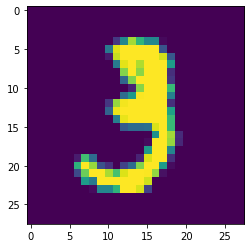

In [6]:
plt.imshow(X_train_full[10])

In [7]:
y_train_full[10]

3

### Data Reshape

In [8]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [9]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Data Normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [10]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

### Split the data in Train / Validation / Test datasets.
* **Training Data** - Used for training the model. <br>
* **Validation Data** - Used for tuning the hyperparameters and evaluate the models. <br>
* **Test Data** - Used to test the model after the model has gone through initial vetting by the validation set.

In [11]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [12]:
print(X_valid.shape, X_train.shape)
print(y_valid.shape, y_train.shape)
print(X_test.shape)

(6000, 28, 28, 1) (54000, 28, 28, 1)
(6000,) (54000,)
(10000, 28, 28, 1)


### Create the Model Architecture

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(200, activation = 'relu'))
model_a.add(keras.layers.Dense(100, activation = 'relu'))
model_a.add(keras.layers.Dense(10, activation = 'softmax'))

In [15]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [16]:
model_a.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [17]:
model_history_a = model_a.fit(X_train, y_train, epochs = 60, batch_size = 64, validation_data = (X_valid, y_valid))

Epoch 1/60
844/844 [==============================] - 19s 22ms/step - loss: 0.6945 - accuracy: 0.8213 - val_loss: 0.2836 - val_accuracy: 0.9162
Epoch 2/60
844/844 [==============================] - 18s 21ms/step - loss: 0.2655 - accuracy: 0.9223 - val_loss: 0.2161 - val_accuracy: 0.9412
Epoch 3/60
844/844 [==============================] - 19s 22ms/step - loss: 0.2069 - accuracy: 0.9370 - val_loss: 0.1734 - val_accuracy: 0.9527
Epoch 4/60
844/844 [==============================] - 19s 22ms/step - loss: 0.1711 - accuracy: 0.9492 - val_loss: 0.1463 - val_accuracy: 0.9617
Epoch 5/60
844/844 [==============================] - 18s 21ms/step - loss: 0.1468 - accuracy: 0.9568 - val_loss: 0.1308 - val_accuracy: 0.9617
Epoch 6/60
844/844 [==============================] - 20s 24ms/step - loss: 0.1285 - accuracy: 0.9617 - val_loss: 0.1195 - val_accuracy: 0.9663
Epoch 7/60
844/844 [==============================] - 19s 23ms/step - loss: 0.1147 - accuracy: 0.9663 - val_loss: 0.1085 - val_accuracy:

844/844 [==============================] - 17s 20ms/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0611 - val_accuracy: 0.9843
Epoch 58/60
844/844 [==============================] - 17s 20ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0582 - val_accuracy: 0.9857
Epoch 59/60
844/844 [==============================] - 18s 22ms/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0605 - val_accuracy: 0.9843
Epoch 60/60
844/844 [==============================] - 18s 21ms/step - loss: 0.0056 - accuracy: 0.9992 - val_loss: 0.0629 - val_accuracy: 0.9838


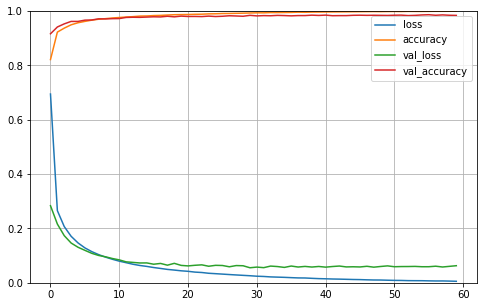

In [18]:
pd.DataFrame(model_history_a.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Model Evaluation

In [19]:
ev_a = model_a.evaluate(X_test, y_test)
ev_a

313/313 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9839


[0.05467979237437248, 0.9839000105857849]

### Therefore, Accuracy of our model on test data set is 98%. So, we can conclude that is a good model.